# Exerciese
Improbe the model and try to get the accuracy above 80%

## Load the data and Preprocess the data

In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Normalize the data.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Create ImageDataGenerator objects for data augmentation.
from keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
generator.fit(x_train)

170498071/170498071 [==============================] - 14s 0us/step


## Build the model

In [2]:
# Set the parameters for the model.
from keras.callbacks import EarlyStopping
batch_size = 100
num_classes = 10
epochs = 50
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')


# Define the model.
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model.
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0

## Train the model

In [3]:
history = model.fit(generator.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/50
500/500 [==============================] - 50s 78ms/step - loss: 1.9628 - accuracy: 0.2623 - val_loss: 2.1184 - val_accuracy: 0.2511
Epoch 2/50
500/500 [==============================] - 39s 78ms/step - loss: 1.6686 - accuracy: 0.3786 - val_loss: 1.5815 - val_accuracy: 0.4183
Epoch 3/50
500/500 [==============================] - 39s 78ms/step - loss: 1.5017 - accuracy: 0.4550 - val_loss: 1.5828 - val_accuracy: 0.4088
Epoch 4/50
500/500 [==============================] - 38s 75ms/step - loss: 1.3610 - accuracy: 0.5151 - val_loss: 1.2482 - val_accuracy: 0.5505
Epoch 5/50
500/500 [==============================] - 38s 75ms/step - loss: 1.2482 - accuracy: 0.5609 - val_loss: 1.8365 - val_accuracy: 0.4846
Epoch 6/50
500/500 [==============================] - 38s 76ms/step - loss: 1.1616 - accuracy: 0.5967 - val_loss: 1.4495 - val_accuracy: 0.5415
Epoch 7/50
500/500 [==============================] - 38s 76ms/step - loss: 1.0902 - accuracy: 0.6250 - val_loss: 1.4489 - val_accuracy:

## Evaluate the model

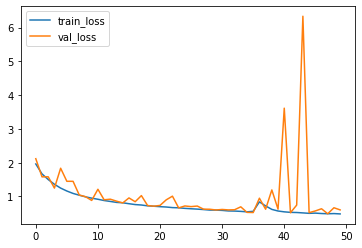

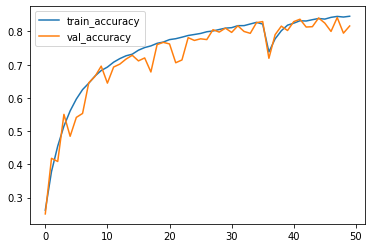

Test loss: 0.6025099158287048
Test accuracy: 0.8163999915122986


In [4]:
# Plot the loss and accuracy curves for training and validation
import matplotlib.pyplot as plt
import numpy as np

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(np.arange(len(train_loss)), train_loss, label='train_loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='train_accuracy')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data using `evaluate`
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)